Using device: cuda


100%|██████████| 32/32 [00:08<00:00,  3.79it/s]


Epoch 1/20:
Train Loss: 0.1883
Val Loss: 0.1730


100%|██████████| 32/32 [00:08<00:00,  3.61it/s]


Epoch 2/20:
Train Loss: 0.1705
Val Loss: 0.1740


100%|██████████| 32/32 [00:08<00:00,  3.62it/s]


Epoch 3/20:
Train Loss: 0.1700
Val Loss: 0.1717


100%|██████████| 32/32 [00:08<00:00,  3.61it/s]


Epoch 4/20:
Train Loss: 0.1692
Val Loss: 0.1727


100%|██████████| 32/32 [00:08<00:00,  3.82it/s]


Epoch 5/20:
Train Loss: 0.1692
Val Loss: 0.1715


100%|██████████| 32/32 [00:08<00:00,  3.91it/s]


Epoch 6/20:
Train Loss: 0.1688
Val Loss: 0.1714


100%|██████████| 32/32 [00:08<00:00,  3.91it/s]


Epoch 7/20:
Train Loss: 0.1688
Val Loss: 0.1714


100%|██████████| 32/32 [00:08<00:00,  3.90it/s]


Epoch 8/20:
Train Loss: 0.1687
Val Loss: 0.1724


100%|██████████| 32/32 [00:08<00:00,  3.91it/s]


Epoch 9/20:
Train Loss: 0.1687
Val Loss: 0.1715


100%|██████████| 32/32 [00:08<00:00,  3.97it/s]


Epoch 10/20:
Train Loss: 0.1692
Val Loss: 0.1716


100%|██████████| 32/32 [00:08<00:00,  3.98it/s]


Epoch 11/20:
Train Loss: 0.1686
Val Loss: 0.1714


100%|██████████| 32/32 [00:08<00:00,  4.00it/s]


Epoch 12/20:
Train Loss: 0.1686
Val Loss: 0.1720


100%|██████████| 32/32 [00:08<00:00,  4.00it/s]


Epoch 13/20:
Train Loss: 0.1691
Val Loss: 0.1724


100%|██████████| 32/32 [00:08<00:00,  4.00it/s]


Epoch 14/20:
Train Loss: 0.1687
Val Loss: 0.1716


100%|██████████| 32/32 [00:08<00:00,  3.99it/s]


Epoch 15/20:
Train Loss: 0.1686
Val Loss: 0.1713


100%|██████████| 32/32 [00:08<00:00,  4.00it/s]


Epoch 16/20:
Train Loss: 0.1685
Val Loss: 0.1714


100%|██████████| 32/32 [00:08<00:00,  3.97it/s]


Epoch 17/20:
Train Loss: 0.1687
Val Loss: 0.1718


100%|██████████| 32/32 [00:08<00:00,  3.96it/s]


Epoch 18/20:
Train Loss: 0.1688
Val Loss: 0.1716


100%|██████████| 32/32 [00:08<00:00,  3.99it/s]


Epoch 19/20:
Train Loss: 0.1683
Val Loss: 0.1715


100%|██████████| 32/32 [00:08<00:00,  3.99it/s]


Epoch 20/20:
Train Loss: 0.1684
Val Loss: 0.1712


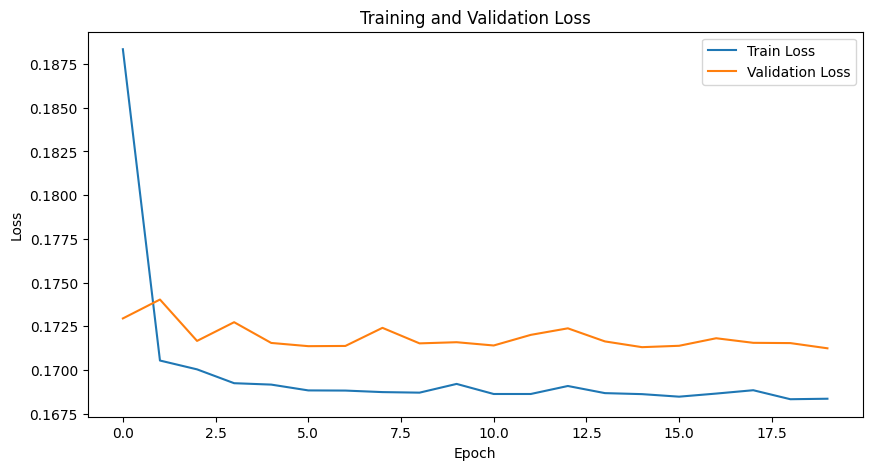

100%|██████████| 32/32 [00:08<00:00,  3.98it/s]


Test Loss: 0.1661


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0281879].


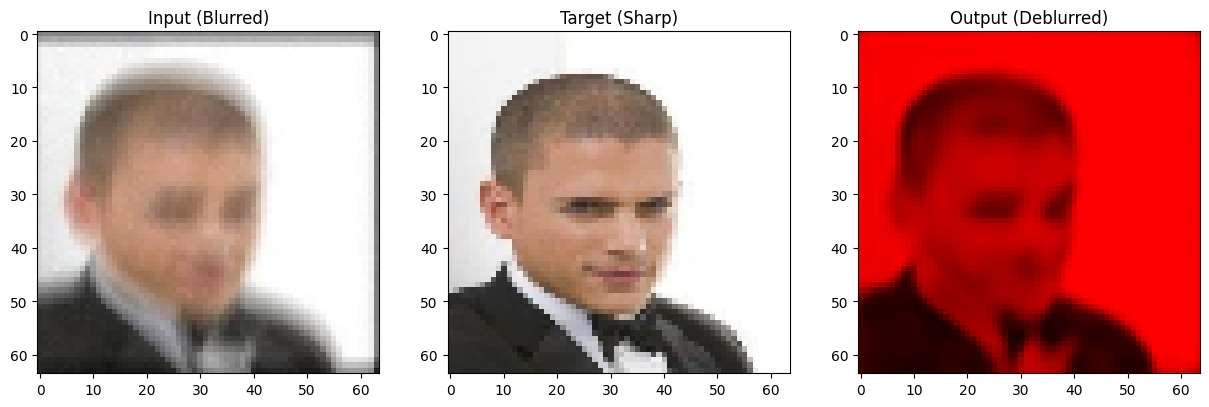

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0375842].


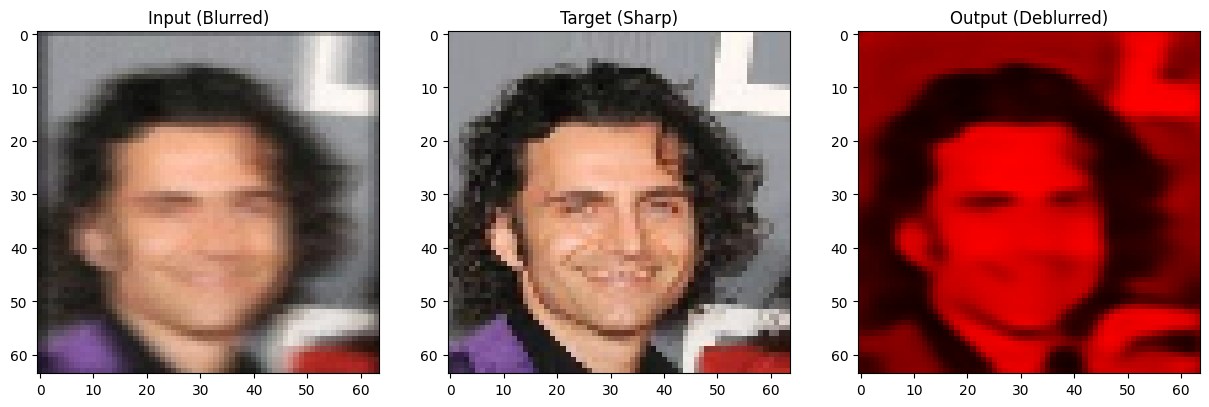

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0482554].


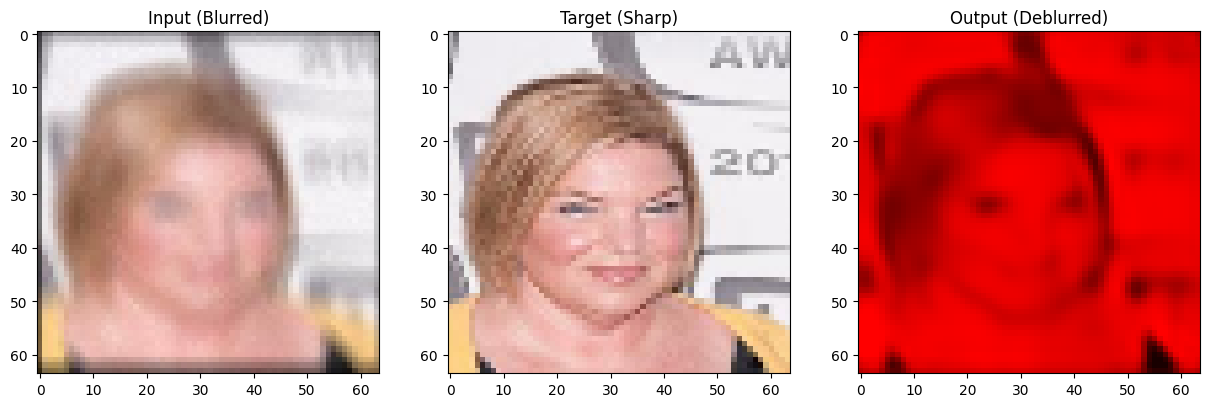

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0439634].


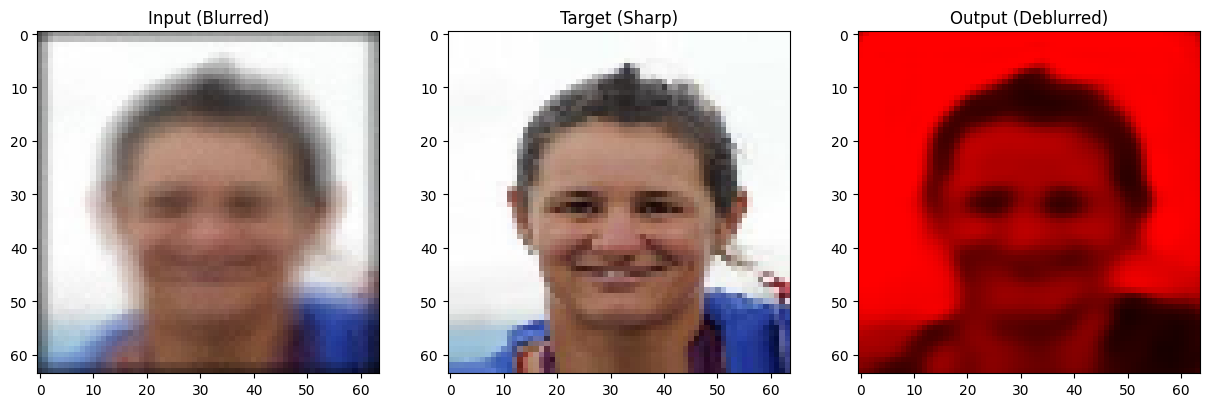

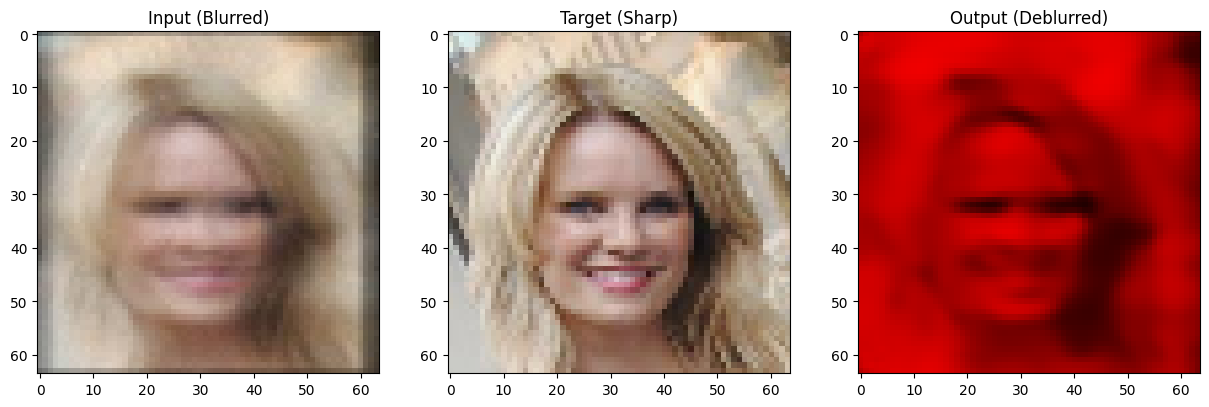

Model saved successfully.


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from tqdm import tqdm

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data loading and preprocessing functions
def process_image(path):
    img = cv2.imread(path)
    img = np.asarray(img, dtype="float32")
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Change to channel-first format
    return img

def load_images(path, subset='train', limit=None):
    blurred_frames = os.listdir(os.path.join(path, subset, 'blur'))[:limit]
    sharp_frames = os.listdir(os.path.join(path, subset, 'sharp'))[:limit]
    
    blurred = [process_image(os.path.join(path, subset, 'blur', file)) for file in blurred_frames]
    sharp = [process_image(os.path.join(path, subset, 'sharp', file)) for file in sharp_frames]
    
    return np.array(blurred), np.array(sharp)

# Load data
data_path = 'DBlur/CelebA/'
train_blurred, train_sharp = load_images(data_path, 'train', limit=5000)
val_blurred, val_sharp = load_images(data_path, 'validation', limit=1000)
test_blurred, test_sharp = load_images(data_path, 'test', limit=1000)

# Convert numpy arrays to PyTorch tensors
train_blurred = torch.from_numpy(train_blurred).float()
train_sharp = torch.from_numpy(train_sharp).float()
val_blurred = torch.from_numpy(val_blurred).float()
val_sharp = torch.from_numpy(val_sharp).float()
test_blurred = torch.from_numpy(test_blurred).float()
test_sharp = torch.from_numpy(test_sharp).float()

# Create datasets and dataloaders
train_dataset = TensorDataset(train_blurred, train_sharp)
val_dataset = TensorDataset(val_blurred, val_sharp)
test_dataset = TensorDataset(test_blurred, test_sharp)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
class DeblurCNN(nn.Module):
    def __init__(self):
        super(DeblurCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, kernel_size=10, stride=1, padding='same')
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 320, kernel_size=1, stride=1, padding='same')
        self.bn2 = nn.BatchNorm2d(320)
        self.conv3 = nn.Conv2d(320, 320, kernel_size=1, stride=1, padding='same')
        self.bn3 = nn.BatchNorm2d(320)
        self.conv4 = nn.Conv2d(320, 320, kernel_size=1, stride=1, padding='same')
        self.bn4 = nn.BatchNorm2d(320)
        self.conv5 = nn.Conv2d(320, 128, kernel_size=1, stride=1, padding='same')
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding='same')
        self.bn6 = nn.BatchNorm2d(128)
        self.conv7 = nn.Conv2d(128, 512, kernel_size=1, stride=1, padding='same')
        self.bn7 = nn.BatchNorm2d(512)
        self.conv8 = nn.Conv2d(512, 128, kernel_size=5, stride=1, padding='same')
        self.bn8 = nn.BatchNorm2d(128)
        self.conv9 = nn.Conv2d(128, 128, kernel_size=5, stride=1, padding='same')
        self.bn9 = nn.BatchNorm2d(128)
        self.conv10 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding='same')
        self.bn10 = nn.BatchNorm2d(128)
        self.conv11 = nn.Conv2d(128, 128, kernel_size=5, stride=1, padding='same')
        self.bn11 = nn.BatchNorm2d(128)
        self.conv12 = nn.Conv2d(128, 128, kernel_size=5, stride=1, padding='same')
        self.bn12 = nn.BatchNorm2d(128)
        self.conv13 = nn.Conv2d(128, 256, kernel_size=1, stride=1, padding='same')
        self.bn13 = nn.BatchNorm2d(256)
        self.conv14 = nn.Conv2d(256, 64, kernel_size=7, stride=1, padding='same')
        self.bn14 = nn.BatchNorm2d(64)
        self.conv15 = nn.Conv2d(64, 3, kernel_size=7, stride=1, padding='same')

    def forward(self, x):
        x = nn.ReLU()(self.bn1(self.conv1(x)))
        x = nn.ReLU()(self.bn2(self.conv2(x)))
        x = nn.ReLU()(self.bn3(self.conv3(x)))
        x = nn.ReLU()(self.bn4(self.conv4(x)))
        x = nn.ReLU()(self.bn5(self.conv5(x)))
        x = nn.ReLU()(self.bn6(self.conv6(x)))
        x = nn.ReLU()(self.bn7(self.conv7(x)))
        x = nn.ReLU()(self.bn8(self.conv8(x)))
        x = nn.ReLU()(self.bn9(self.conv9(x)))
        x = nn.ReLU()(self.bn10(self.conv10(x)))
        x = nn.ReLU()(self.bn11(self.conv11(x)))
        x = nn.ReLU()(self.bn12(self.conv12(x)))
        x = nn.ReLU()(self.bn13(self.conv13(x)))
        x = nn.ReLU()(self.bn14(self.conv14(x)))
        x = nn.ReLU()(self.conv15(x))
        return x

# Initialize the model, loss function, and optimizer
model = DeblurCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training function
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, targets in tqdm(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    return running_loss / len(train_loader.dataset)

# Validation function
def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(val_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            running_loss += loss.item() * inputs.size(0)
    
    return running_loss / len(val_loader.dataset)

# Training loop
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    val_loss = validate(model, val_loader, criterion, device)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}')
    print(f'Val Loss: {val_loss:.4f}')

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('loss_curves.png')
plt.show()

# Evaluate on test set
test_loss = validate(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}')

# Function to display results
def display_results(model, test_loader, device, num_samples=5):
    model.eval()
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(test_loader):
            if i >= num_samples:
                break
            
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            
            input_img = inputs[0].cpu().numpy().transpose(1, 2, 0)
            target_img = targets[0].cpu().numpy().transpose(1, 2, 0)
            output_img = outputs[0].cpu().numpy().transpose(1, 2, 0)
            
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
            ax1.imshow(input_img)
            ax1.set_title('Input (Blurred)')
            ax2.imshow(target_img)
            ax2.set_title('Target (Sharp)')
            ax3.imshow(output_img)
            ax3.set_title('Output (Deblurred)')
            plt.savefig(f'deblur_result_{i+1}.png')
            plt.show()

# Display results
display_results(model, test_loader, device)

# Save the model
torch.save(model.state_dict(), 'deblur_cnn_model.pth')
print("Model saved successfully.")